# __JCDS-0808-008-Alifia Adi Prasetyo || AWS SaaS Sales Analysis__

---

# > Business Understanding

### Deskripsi Dataset
Dataset ini berisi penjualan produk **SaaS (Software as a Service)** kepada berbagai customer dari berbagai negara.  
Dari struktur data, kita dapat memahami hal-hal seperti perilaku penjualan, profitabilitas, serta karakteristik pelanggan.

### Tujuan Bisnis Utama
- Memantau penjualan SaaS berdasarkan **produk, wilayah, industri, dan segmen pelanggan**.  
- Mengukur **profitabilitas penjualan** setelah diskon.  
- Mengidentifikasi **pelanggan paling bernilai** (misalnya Strategic vs SMB).  
- Mengetahui **kinerja tiap produk** untuk strategi pricing, diskon, dan bundling.

### Masalah Bisnis Potensial
- Apakah diskon yang diberikan **efektif atau justru menurunkan profit**.  
- Produk atau segmen mana yang **mendatangkan profit paling besar**.  
- Apakah ada **wilayah atau industri tertentu** yang lebih menguntungkan.  
- Bagaimana strategi **retensi pelanggan** dapat ditingkatkan.  

### Manfaat bagi Perusahaan
- Membantu **decision making** terkait pricing, promo, dan strategi **market expansion**.  
- Memberikan pemahaman terhadap **tren pelanggan** (SMB vs Strategic).  
- Mengetahui potensi **market di berbagai negara**.


---

#  > Data Understanding

In [5]:
import pandas as pd 
path = "C:\\Users\\Zein\\Downloads\\SaaS-Sales.csv"
df = pd.read_csv(path) # Membuat dan menampilkan DataFrame dari file berupa ".csv"
df.head() 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [6]:
df.info() # Menampilkan informasi mengenai DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

###  Hasil Eksplorasi Awal
1. **Jumlah Data**  
   - Total **9.994 baris** dan **19 kolom**.

2. **Kunci Utama**
   - **Row ID** → unik untuk setiap baris.  
   - **Order ID** → satu pesanan dapat memiliki beberapa produk (mirip nomor faktur).  
   - **License** → kemungkinan unik untuk setiap produk yang terjual.

3. **Kolom Penting**
   - **Order & Date**: `Order ID`, `Order Date`, `Date Key` → untuk tracking transaksi.  
   - **Customer & Contact**: `Contact Name`, `Customer`, `Customer ID`, `Country`, `Region`, `Subregion`.  
   - **Segmentation**: `Industry` (contoh: Energy, Finance, dll), `Segment` (SMB, Strategic, Enterprise).  
   - **Product Info**: `Product` (contoh: Marketing Suite, FinanceHub, dll), `License` (unik per pembelian).  
   - **Financial Metrics**: `Sales`, `Quantity`, `Discount`, `Profit`.

###  Insight Awal
- Terdapat **3 segmen utama**: SMB (Small & Medium Business), Strategic, dan Enterprise.  
- Ada **10 industri** yang menjadi target SaaS.  
- Data mencakup **48 negara** dan terbagi dalam **3 region utama**: AMER, EMEA, APAC.  
- Nilai **Discount** bervariasi dan memengaruhi **Profit** (bahkan bisa bernilai negatif).  
- Produk SaaS yang dijual cukup banyak, yakni **14 jenis produk**.

---

# > Problem Statement

### 1. Profit Negatif  
- Ada baris dengan `profit < 0`  pada data, dikarenakan memberi diskon terlalu tinggi.  
- **Contoh:** Order ID **EMEA-2021-108966** memiliki diskon **45%** dan menghasilkan profit negatif.  
- **Problem:** Strategi diskon yang diberikan tidak tepat, yang dapat mengakibatkan penurunan profit sebuah perusahaan.  

### 2. Ketergantungan Region Tertentu  
- Dari statistik awal, **region `EMEA`** memiliki jumlah order terbanyak.  
- **Problem:** Ketidakseimbangan market > terlalu bergantung pada satu region, bisa berisiko jika terjadi penurunan permintaan di wilayah tersebut.  

### 3. Dominasi Segmen Tertentu  
- Segmen **SMB** menyumbang lebih dari **50% total order**.  
- **Problem:** Perusahaan mungkin terlalu bergantung pada SMB, padahal margin keuntungan di segmen **Enterprise/Strategic** biasanya lebih tinggi.  

### 4. Variasi Produk  
- Ada sekitar **14 produk SaaS** yang dijual.  
- Belum jelas mana yang konsisten menghasilkan profit dan mana yang sering merugi.  
- **Problem:** Potensi ada produk “tidak sehat” yang tetap dijual meski margin buruk, sehingga menggerus profitabilitas.  

---

# > Data Cleaning 

In [7]:
df.info() # Melihat kolom2 yang ada di dalam DataFrame dan untuk melihat type tiap kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [8]:
df.describe() # Melihat kolom2 yang berisikan numerik dan bisa dijumlahkan.

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.isna().sum() # Melihat tiap kolom apakah ada missing value didalamnya. 

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df["Order Date"]

0        11/9/2022
1        11/9/2022
2        6/13/2022
3       10/11/2021
4       10/11/2021
           ...    
9989     1/22/2020
9990     2/27/2023
9991     2/27/2023
9992     2/27/2023
9993      5/5/2023
Name: Order Date, Length: 9994, dtype: object

In [11]:
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') 

# error karna format date yang sudah ada di dataframe tidak sesuai dengan format yang kita butuhkan

In [12]:
target_format = '%d/%m/%Y'

mask_error = []
for date_str in df['Order Date']:
    try:
        pd.to_datetime(date_str, format=target_format)
        mask_error.append(False)  # cocok
    except ValueError:
        mask_error.append(True)   # error

df_error = df[mask_error]
print(df_error)

      Row ID          Order ID  Order Date  Date Key       Contact Name  \
2          3  AMER-2022-138688   6/13/2022  20220613     Deirdre Bailey   
12        13  EMEA-2023-114412   4/16/2023  20230416      Adrian Hunter   
14        15   APJ-2021-118983  11/22/2021  20211122     Emily Morrison   
15        16   APJ-2021-118983  11/22/2021  20211122     Emily Morrison   
17        18  EMEA-2020-167164   5/13/2020  20200513     Carol Campbell   
...      ...               ...         ...       ...                ...   
9988    9989  EMEA-2023-163629  11/18/2023  20231118      Dylan Dickens   
9989    9990  EMEA-2020-110422   1/22/2020  20200122          Dan Allan   
9990    9991  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9991    9992  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   
9992    9993  AMER-2023-121258   2/27/2023  20230227  Anthony Sanderson   

            Country           City Region Subregion           Customer  \
2     United States  New 

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False, errors='coerce')

In [14]:
df['Order Date'] = df['Order Date'].dt.strftime('%d/%m/%Y')

In [15]:
df["Order Date"]

0       09/11/2022
1       09/11/2022
2       13/06/2022
3       11/10/2021
4       11/10/2021
           ...    
9989    22/01/2020
9990    27/02/2023
9991    27/02/2023
9992    27/02/2023
9993    05/05/2023
Name: Order Date, Length: 9994, dtype: object

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [17]:
df['Order Date']

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

## __> Mengapa penting sekali jika suatu kolom `order date` ataupun kolom yang berisi tanggal masih dalam bentuk `object`?__

## 1. Batasan dalam analisis waktu
Kamu tidak bisa langsung melakukan operasi berbasis waktu seperti:

* Mengurutkan tanggal secara benar (sort_values)
* Menghitung selisih hari/bulan/tahun (timedelta)
* Mengambil bagian tertentu seperti year, month, day

## 2. Rawan error saat agregasi
* Fungsi seperti resample, groupby berdasarkan periode, atau rolling butuh tipe datetime.
* Kalau masih object, pandas akan menganggapnya kategori/teks → hasilnya salah atau error.

## 3. Efisiensi memori & performa

* datetime64 di pandas disimpan lebih efisien dibanding string, sehingga:
* Lebih hemat memori
* Operasi lebih cepat saat filter atau kalkulasi waktu

## 4. Mencegah salah interpretasi format

* String "01/02/2024" bisa berarti 1 Februari atau 2 Januari tergantung format.
* Saat diubah ke datetime, formatnya menjadi standar ISO (YYYY-MM-DD) sehingga lebih konsisten dan aman.

## __> Karena di dataset ini bersih dalam artian tidak ada missing values, namun hanya ada kesalahan kolom yang masih dalam bentuk object/string__

---

# > Data Analysis

## 1. Exploratory Data Analysis (EDA)

* Dengan tujuan untuk melihat ringkasan nilai seperti `Median`, `Min`,`Max`, `Mean`, `Spread`, dan lain lain.

In [18]:
df.describe() # Untuk melihat data data atau kolom yang berisikan data numerik

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


In [19]:
df.describe(include='object') # Untuk melihat data data atau kolom yang bertipe object

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


### Hasil yang didapatkan:

* Rata-rata penjualan `(Sales)` per transaksi.
* Rata-rata `profit` dan sebarannya.
* Distribusi `discount` (apakah sering 0% atau besar-besaran).

## 2. Distribusi Data

* Tujuan: memahami sebaran nilai tiap variabel.

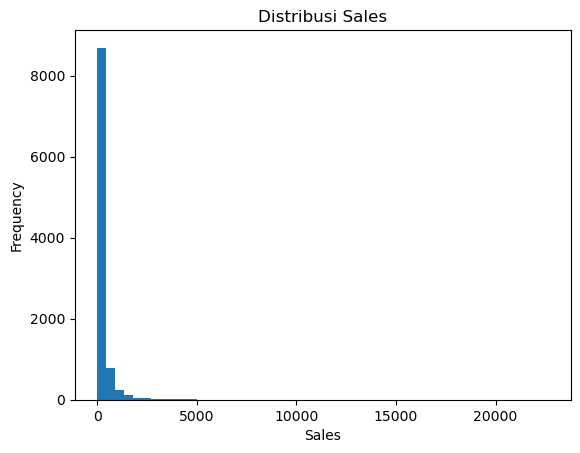

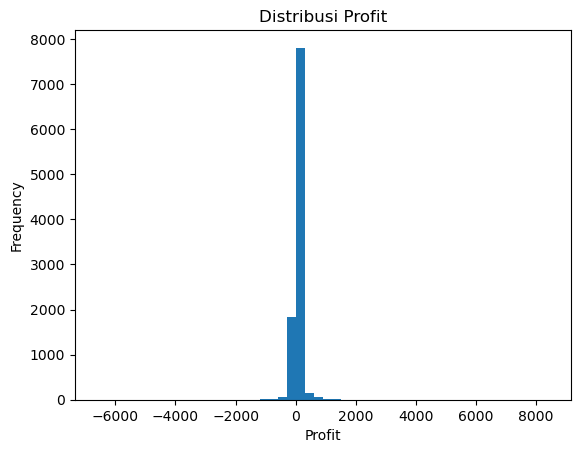

In [ ]:
import matplotlib.pyplot as plt

# Histogram Sales
plt.hist(df['Sales'], bins=50) # bins=50 untuk menentukan jumlah bin yang akan digunakan pada histogram
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribusi Sales')
plt.show()

# Histogram Profit
plt.hist(df['Profit'], bins=50)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribusi Profit')
plt.show()

# Hasil Analisis Distribusi

### 1. Distribusi `Sales`
- Mayoritas transaksi berada di nilai **sales rendah** (sekitar 0–1000).  
- Ada sedikit transaksi dengan nilai sales **sangat besar** (hingga >20.000), tapi jumlahnya jarang → disebut **outlier**.  
- Distribusi berbentuk **right-skewed (condong ke kanan)** → banyak transaksi kecil, sedikit transaksi besar.  
- **Insight**:  
  - Sebagian besar penjualan per transaksi bernilai kecil.  
  - Ada beberapa transaksi bernilai sangat tinggi yang perlu dianalisis lebih lanjut (kemungkinan pembelian dalam jumlah besar atau kategori produk tertentu).

### 2. Distribusi `Profit`
- Mayoritas nilai profit berada **dekat 0** (baik positif maupun negatif).  
- Banyak transaksi yang menghasilkan **kerugian (profit negatif)**, bahkan cukup besar (hingga sekitar -7000).  
- Ada juga transaksi dengan **keuntungan besar** (hingga +8000), tapi jumlahnya jarang.  
- Distribusi cenderung **berpusat di sekitar nol** dengan ekor panjang ke kiri (kerugian besar) dan kanan (keuntungan besar).  
- **Insight**:  
  - Sebagian besar transaksi menghasilkan **profit tipis**.  
  - Ada kasus **rugi besar** maupun **untung besar** → perlu ditelusuri penyebabnya (misalnya diskon besar, biaya tinggi, atau strategi pricing yang kurang tepat).

## 3. Analisis Berdasarkan Kategori

* Tujuan: melihat perbandingan metrik di kategori seperti Country, Region, Segment, atau Product.

In [21]:
df["Region"].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [22]:
# Rata-rata penjualan per region menggunakan mean
df.groupby('Region')['Sales'].mean().sort_values(ascending=False) 

Region
EMEA    247.425223
AMER    228.608350
APJ     196.902484
Name: Sales, dtype: float64

In [37]:
# Jumlah penjualan per region menggunakan sum
df.groupby('Region')['Sales'].sum().sort_values(ascending=False) 

Region
EMEA    1.043887e+06
AMER    8.378496e+05
APJ     4.154642e+05
Name: Sales, dtype: float64

In [23]:
# Total profit per industry menggunakan sum
df.groupby('Industry')['Profit'].sum().sort_values(ascending=False)

Industry
Finance              50348.9696
Energy               45282.3137
Manufacturing        38413.1064
Consumer Products    37018.0077
Healthcare           31969.0932
Retail               30207.8208
Tech                 24615.0436
Communications       13976.3410
Transportation        7402.6967
Misc                  7163.6290
Name: Profit, dtype: float64

In [24]:
# Jumlah order per segment menggunakan value counts
df['Segment'].value_counts()

Segment
SMB           5191
Strategic     3020
Enterprise    1783
Name: count, dtype: int64

### Hasil yang didapat:

* Melihat berapa banyak rata rata penjualan yang didapatkan per negara
* Industri mana saja yang mendapatkan untung dan rugi 
* Segment mana saja yang paling sering dibeli

## 4. Korelasi antar Variabel

* Tujuan: mengetahui hubungan antara metrik penjualan.

In [25]:
# Korelasi numerik
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
print(corr)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


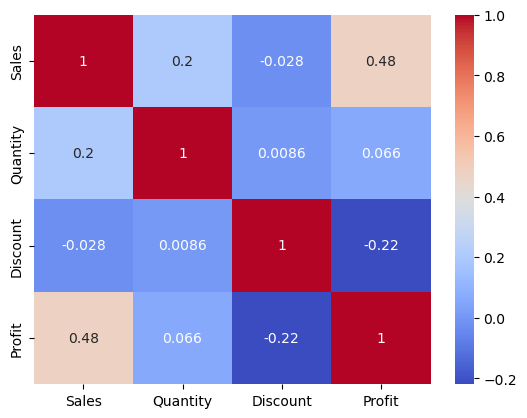

In [26]:
# Visualisasi korelasi
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Insight dari Heatmap Korelasi

### 1. Sales ↔ Profit (0.48, positif sedang)
- Semakin tinggi **Sales**, cenderung semakin tinggi **Profit**.  
- Namun korelasinya tidak sempurna → ada kasus **sales tinggi tapi profit kecil/rugi** (kemungkinan karena diskon besar atau biaya tinggi).

### 2. Discount ↔ Profit (-0.22, negatif)
- Semakin besar **Discount**, cenderung **Profit menurun**.  
- Efeknya cukup terasa meskipun tidak terlalu kuat → sinyal bahwa diskon **tidak selalu efektif** meningkatkan keuntungan.

### 3. Quantity ↔ Sales (0.20, positif lemah)
- Order dengan jumlah item besar **belum tentu menghasilkan sales tinggi**.  
- Kemungkinan karena **harga per unit berbeda-beda** atau order besar sering berasal dari **produk murah**.

### 4. Quantity ↔ Profit (0.066, sangat lemah)
- Banyaknya barang terjual **tidak menjamin profit tinggi**.  
- Hal ini bisa terjadi karena **margin keuntungan per produk berbeda-beda**.

### 5. Discount ↔ Sales (-0.028, sangat lemah)
- **Diskon tidak berkorelasi signifikan** dengan peningkatan sales total.  
- Artinya, strategi **diskon besar-besaran** kemungkinan **kurang efektif** untuk mendorong penjualan.

## 5. Top Product (Sales/Profit)

C:\Users\Zein\AppData\Local\Temp\ipykernel_22684\3226714150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette="Blues_r")


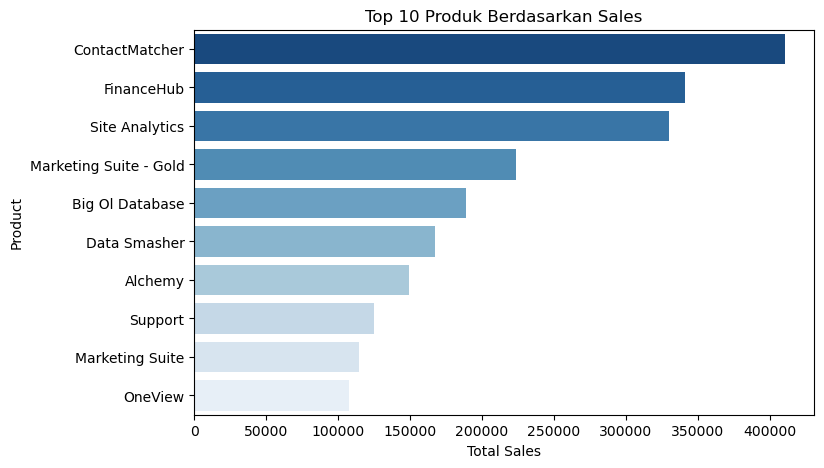

C:\Users\Zein\AppData\Local\Temp\ipykernel_22684\3226714150.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_profit.values, y=top_products_profit.index, palette="Greens_r")


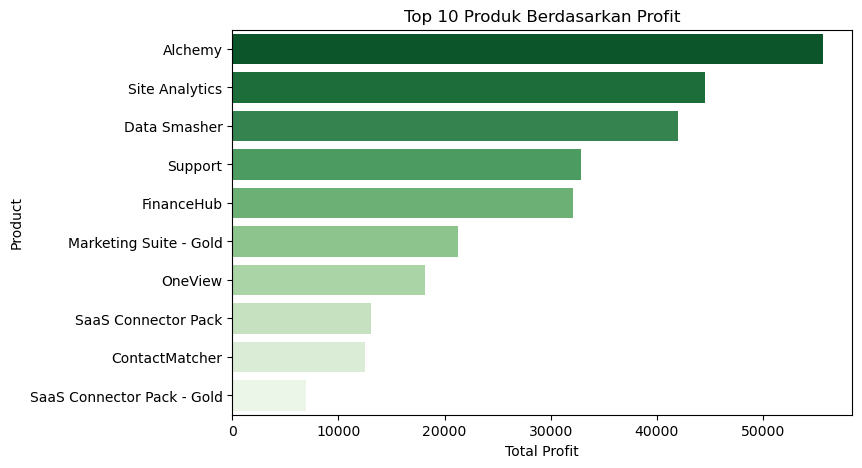

In [ ]:
# Top 10 produk berdasarkan Sales
top_products_sales = df.groupby("Product")["Sales"].sum().nlargest(10) # Mengelompokkan data berdasarkan produk dan menjumlahkan sales, lalu mengambil 10 teratas

plt.figure(figsize=(8,5))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index, palette="Blues_r")
plt.title("Top 10 Produk Berdasarkan Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

# Top 10 produk berdasarkan Profit
top_products_profit = df.groupby("Product")["Profit"].sum().nlargest(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products_profit.values, y=top_products_profit.index, palette="Greens_r")
plt.title("Top 10 Produk Berdasarkan Profit")
plt.xlabel("Total Profit")
plt.ylabel("Product")
plt.show()

## 6. Transaksi merugikan

In [ ]:
# Top 10 Transaksi yang paling rugi
transaksi_merugikan = df.nsmallest(10, "Profit")[["Order ID", "Product", "Customer", "Sales", "Discount", "Profit"]] #nsmallest digunakan untuk mengambil 10 baris dengan nilai profit terkecil
transaksi_merugikan

,Order ID,Product,Customer,Sales,Discount,Profit
7772,AMER-2022-108196,Big Ol Database,Allstate,4499.985,0.7,-6599.9780
683,EMEA-2023-168116,Big Ol Database,Costco Wholesale,7999.980,0.5,-3839.9904
9774,APJ-2020-169019,ContactMatcher,Bosch,2177.584,0.8,-3701.8928
3011,EMEA-2023-134845,Big Ol Database,FedEx,2549.985,0.7,-3399.9800
4991,APJ-2023-122714,ContactMatcher,Ford Motor,1889.990,0.8,-2929.4845
3151,AMER-2021-147830,Big Ol Database,Walgreens,1799.994,0.7,-2639.9912
5310,APJ-2023-131254,ContactMatcher,Itochu,1525.188,0.8,-2287.7820
9639,EMEA-2021-116638,ContactMatcher,Morgan Stanley,4297.644,0.4,-1862.3124
1199,APJ-2022-130946,ContactMatcher,Volkswagen,1088.792,0.8,-1850.9464
2697,EMEA-2020-145317,Big Ol Database,Anthem,22638.480,0.5,-1811.0784


## 7. Scatterplot hubungan antar variabel

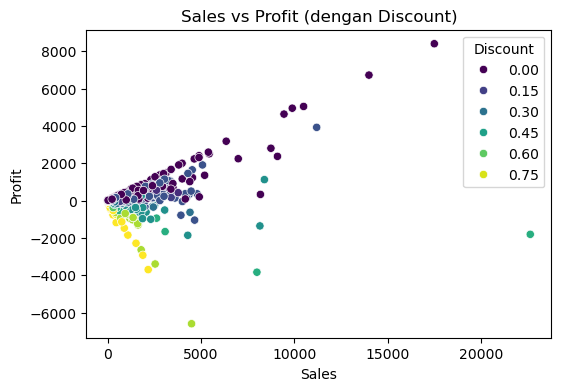

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Sales", y="Profit", hue="Discount", palette="viridis") # hue adalah untuk memberikan warna berdasarkan nilai Discount
plt.title("Sales vs Profit (dengan Discount)")
plt.show()

__Kesimpulan yang didapat__

* Diskon rendah → cenderung sehat (profit positif).
* Diskon tinggi → rawan merugi meskipun sales meningkat.
* Perusahaan butuh meninjau ulang strategi diskon agar tidak mengorbankan profit demi sales.

## 8. Tren penjualan SaaS dari tahun ke tahun

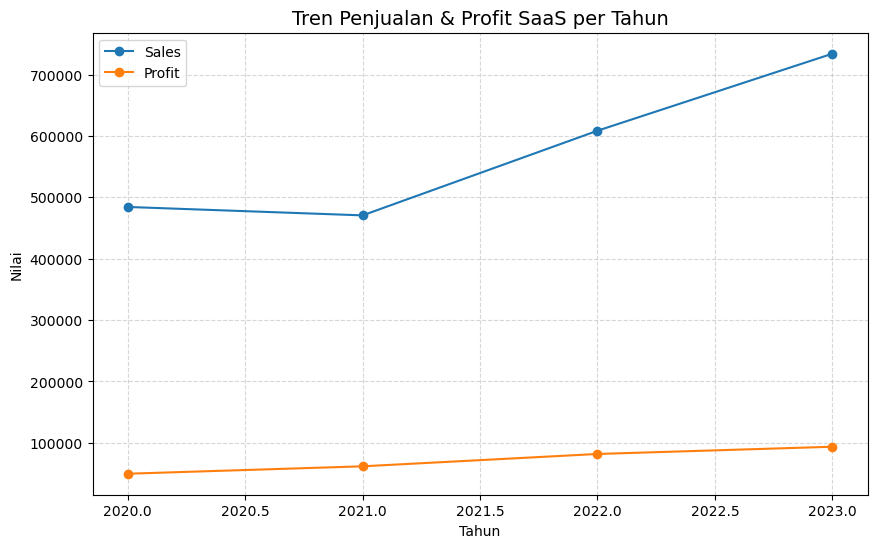

In [32]:
# Ambil tahun
df['Year'] = df['Order Date'].dt.year

# Agregasi sales per tahun
sales_trend = df.groupby('Year')['Sales'].sum().reset_index()

# Agregasi profit per tahun
profit_trend = df.groupby('Year')['Profit'].sum().reset_index()

# Plot tren sales
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Year'], sales_trend['Sales'], marker='o', label='Sales')
plt.plot(profit_trend['Year'], profit_trend['Profit'], marker='o', label='Profit') 
plt.title("Tren Penjualan & Profit SaaS per Tahun", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5) 
plt.show()

## 9. `Profit` Negatif (diskon terlalu tinggi)

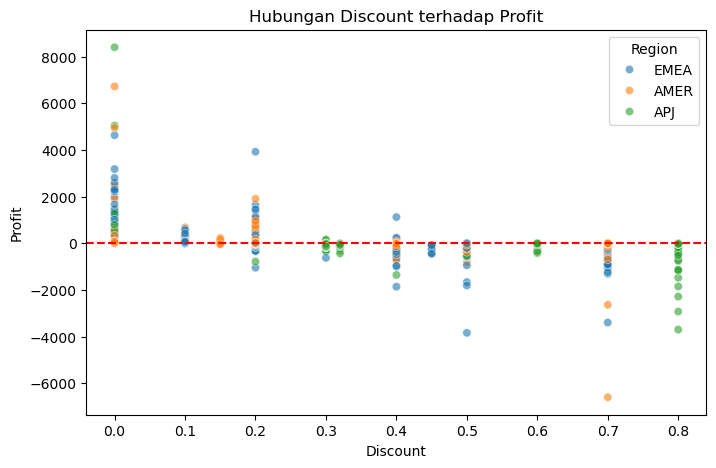

In [38]:
# Scatter plot Discount vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Discount", y="Profit", hue="Region", alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Hubungan Discount terhadap Profit")
plt.show()

## 10. Ketergantungan `Region` Tertentu (dominan pada `Region EMEA`)

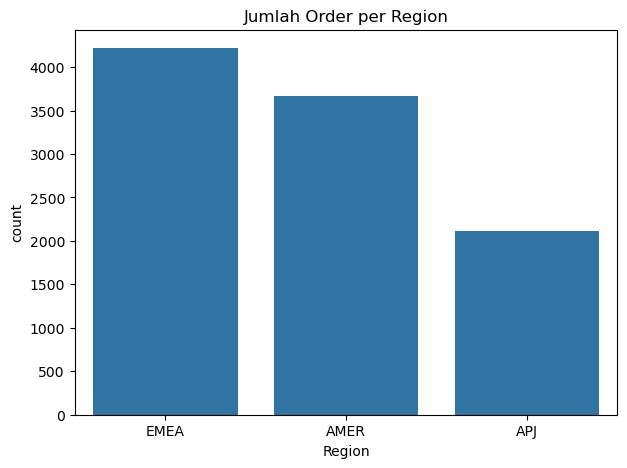

In [39]:
# Barplot Orders by Region
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Region", order=df['Region'].value_counts().index)
plt.title("Jumlah Order per Region")
plt.show()

## 11. Dominasi Segment `SMB`

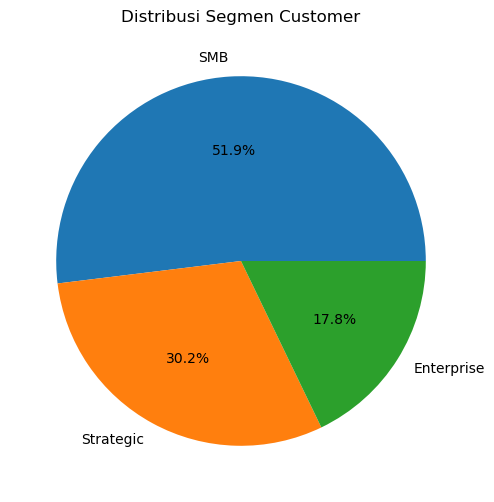

In [ ]:
# Pie chart Segment Distribution
df['Segment'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6)) # autopct untuk menampilkan persentase 
                                                                                # dan '%1.1f%%' adalah format untuk menampilkan persentase dengan satu desimal
plt.title("Distribusi Segmen Customer")
plt.ylabel("")
plt.show()

## 12. Variasi `Produk` (ada produk sering __`rugi`__)

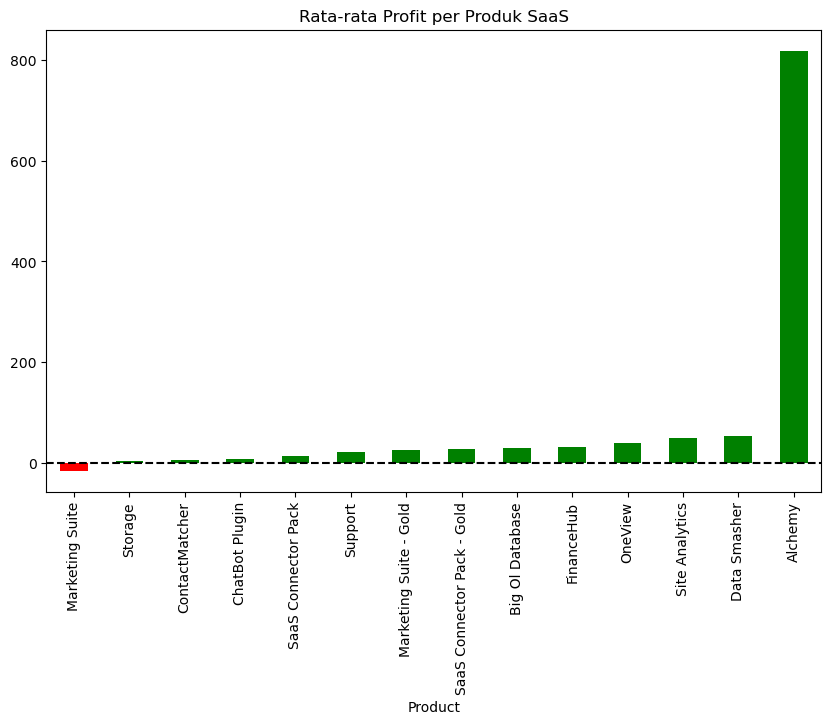

In [44]:
# Average Profit per Product
product_profit = df.groupby("Product")["Profit"].mean().sort_values()

plt.figure(figsize=(10,6))
product_profit.plot(kind="bar", color=(product_profit > 0).map({True:"green", False:"red"}))
plt.axhline(0, color="black", linestyle="--")
plt.title("Rata-rata Profit per Produk SaaS")
plt.show()

---

# > Deployment & Business Recommendation

### Ringkasan Insight Utama
- **Diskon** terbukti berkorelasi negatif dengan profit, serta tidak signifikan meningkatkan sales → strategi diskon besar-besaran tidak efektif.  
- **Produk SaaS** menunjukkan pola Pareto: sebagian kecil produk menyumbang mayoritas sales & profit, sementara ada beberapa produk yang justru merugikan.  
- **Segmen Strategic** memberi kontribusi profit paling besar dibanding SMB & Enterprise.  
- Dari sisi wilayah, **AMER** masih dominan dalam total sales, tetapi **APAC** menunjukkan potensi pertumbuhan yang menjanjikan.  
- Distribusi transaksi memperlihatkan mayoritas bernilai kecil, dengan beberapa transaksi outlier bernilai sangat besar (high-value deals).

### Rekomendasi Bisnis
1. **Pricing & Discount**
   - Batasi pemberian diskon, gunakan hanya pada segmen/produk yang memang sensitif harga.  
   - Uji strategi **value-based pricing** atau **bundling** untuk menjaga profitabilitas tanpa harus menurunkan harga.  

2. **Product Portfolio**
   - Fokus pada pengembangan dan promosi produk dengan kontribusi profit tinggi.  
   - Evaluasi ulang produk SaaS yang berulang kali menghasilkan kerugian (misalnya karena margin kecil atau kebutuhan support tinggi).  

3. **Customer Segmentation & Retention**
   - Prioritaskan **Strategic customers** untuk program loyalitas dan retensi → karena memberi kontribusi profit terbesar.  
   - Buat analisis churn untuk segmen SMB, walaupun profit lebih kecil, jumlahnya banyak.  

4. **Regional Market Strategy**
   - Pertahankan dominasi di **AMER** dengan memperkuat hubungan existing customers.  
   - Lakukan ekspansi agresif di **APAC** (misalnya target industri Finance & Healthcare yang tumbuh cepat).  

### Deployment Ideas
- Bangun **dashboard interaktif** (Power BI / Looker Studio) untuk monitoring real-time:  
  - Sales & Profit per produk, segmen, industri, region.  
  - Efektivitas diskon terhadap profit.  
  - High-value customers dan churn risk.  

- **Predictive Analytics** (tahap lanjutan):  
  - Model prediksi profitabilitas berdasarkan sales, discount, dan quantity.  
  - Segmentasi customer dengan clustering untuk strategi marketing yang lebih personal.  

---